In [3]:
"""
OBEREG
1 - New England CT ME MA NH RI VT
2 - Mid East DE DC MD NJ NY PA
3 - Great Lakes IL IN MI OH WI
4 - Plains IA KS MN MO NE ND SD
5 - Southeast AL AR FL GA KY LA MS NC SC TN VA WV
6 - Southwest AZ NM OK TX
7 - Rocky Mountains CO ID MT UT WY
8 - Far West AK CA HI NV OR WA
9 - Outlying areas AS FM GU MH MP PR PW VI
"""


'\nOBEREG\n1 - New England CT ME MA NH RI VT\n2 - Mid East DE DC MD NJ NY PA\n3 - Great Lakes IL IN MI OH WI\n4 - Plains IA KS MN MO NE ND SD\n5 - Southeast AL AR FL GA KY LA MS NC SC TN VA WV\n6 - Southwest AZ NM OK TX\n7 - Rocky Mountains CO ID MT UT WY\n8 - Far West AK CA HI NV OR WA\n9 - Outlying areas AS FM GU MH MP PR PW VI\n'

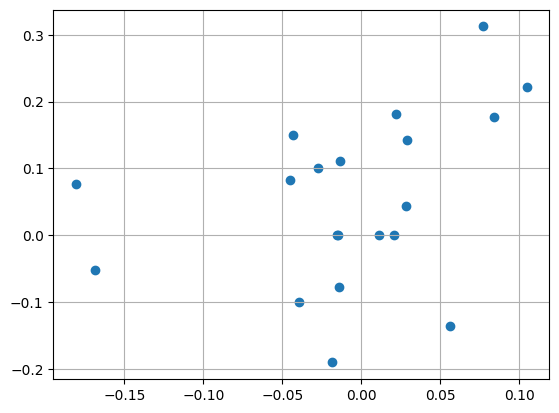

In [4]:
plt.scatter(merged['black_cs'].pct_change(), merged['black_pct'].pct_change())
plt.grid()

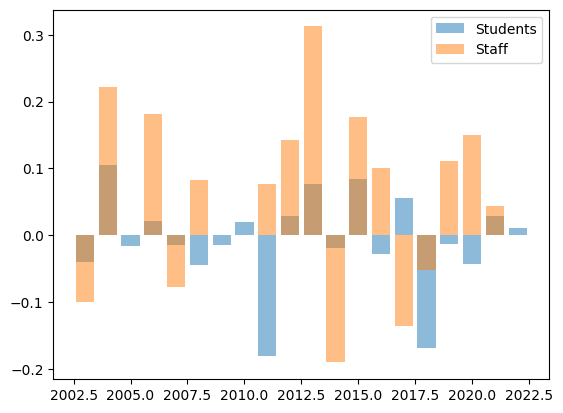

In [5]:
plt.bar(range(2002, 2023), merged['black_cs'].pct_change(), alpha=0.5, label='Students')
# plt.plot(merged['black_cs'].pct_change())
plt.bar(range(2002, 2023), merged['black_pct'].pct_change(), alpha=0.5, label='Staff')
# plt.plot(merged['black_pct'].pct_change())
plt.legend()
# plt.twinx()
# plt.plot(cs_staff['black_pct'], color='red')

In [6]:

# merged.to_csv('taulbee_vs_cs_stats.csv')

In [7]:
# import pandas as pd
# from matplotlib import pyplot as plt

# stud   = pd.read_csv('all_student_inst.csv',index_col=0)

# stud = stud[stud['CARNEGIE'].apply(lambda x: x in [15, 16, 31, 32])]
# stud.head()

In [8]:

# inst = stud[stud['INSTNM']=='Clemson University']
# inst

In [9]:

import pandas as pd
from matplotlib import pyplot as plt
cs_staff   = pd.read_csv('taulbee_csstaff.csv')
cs_staff.columns = [x.strip() for x in cs_staff.columns]
cs = cs_staff[['Year', 'black_pct', 'hispanic_pct', 'women_pct']]
cs_staff
staff   = pd.read_csv('all_staff_inst.csv',index_col=0)
staff['Grand total']      =staff['Grand total'].str.replace(',','')
staff['Grand total women']=staff['Grand total women'].str.replace(',','')
staff['OBEREG']           =staff['OBEREG'].astype(float)
staff['Grand total']      =staff['Grand total'].astype(float)
staff['Grand total women']=staff['Grand total women'].astype(float)

# staff_size  = staff[staff["INSTSIZE"] == 2]  
# staff_reg   = staff[staff["OBEREG"]==8]
# stud_size   = stud[stud["INSTSIZE"] == 5]  
# stud_reg   = stud[stud["OBEREG"]==7]

stud = pd.read_csv('all_student_inst.csv')


cs.set_index('Year', inplace=True)
cs = cs.apply(lambda col: col.apply(lambda x: float(x[:-1]))/100)
cs.reset_index(inplace=True)
cs


staff_set                      = staff.groupby('Year')[[ 'Grand total','Black total','Hispanic total',\
                                                        'Grand total women' ]].sum()
staff_set['Black total']       = staff_set['Black total']/staff_set['Grand total']
staff_set['Hispanic total']    = staff_set['Hispanic total']/staff_set['Grand total']
staff_set['Grand total women'] = staff_set['Grand total women']/staff_set['Grand total']
staff_set = staff_set.rename(columns={"Black total":"black_staff_stat"})
staff_set = staff_set.rename(columns={"Hispanic total":"hispanic_staff_stat"})
staff_set = staff_set.rename(columns={"Grand total women":"women_staff_stat"})
staff_set

stud_set = stud.groupby('Year')[[ 'grand_total','black_total','hispanic_total',\
                                 'women_total', 'total_cs','black_cs','hispanic_cs','women_cs', ]].sum()
stud_set['black_cs']           = stud_set['black_cs']/(stud_set['total_cs'])
stud_set['hispanic_cs']        = stud_set['hispanic_cs']/stud_set['total_cs']
stud_set['women_cs']           = stud_set['women_cs']/stud_set['total_cs']
stud_set['black_noncs']        = (stud_set['black_total']-stud_set['black_cs'])/stud_set['grand_total']
stud_set['hispanic_noncs']     = (stud_set['hispanic_total']-stud_set['hispanic_cs'])/stud_set['grand_total']
stud_set['women_noncs']        = (stud_set['women_total']-stud_set['women_cs'])/stud_set['grand_total']
stud_set= stud_set.reset_index()
merged = pd.merge(cs, stud_set, on='Year')
merged


,Year,black_pct,hispanic_pct,women_pct,grand_total,black_total,hispanic_total,women_total,total_cs,black_cs,hispanic_cs,women_cs,black_noncs,hispanic_noncs,women_noncs
0,2002,0.010,0.017,0.138,1388599,115052,101659,801214,50606.0,0.098190,0.054440,0.266767,0.082855,0.073210,0.576994
1,2003,0.009,0.017,0.140,1331285,108436,96099,767448,44028.0,0.094326,0.050014,0.272395,0.081452,0.072185,0.576471
2,2004,0.011,0.020,0.144,1481835,124663,112325,854360,46408.0,0.104206,0.059322,0.219079,0.084127,0.075801,0.576555
3,2005,0.011,0.017,0.149,1437610,120624,106688,829353,50464.0,0.102568,0.054653,0.246057,0.083906,0.074212,0.576897
4,2006,0.013,0.017,0.154,1517877,128328,117882,877609,39634.0,0.104809,0.064061,0.200510,0.084544,0.077662,0.578182
5,2007,0.012,0.018,0.158,1553533,131259,124064,894285,34255.0,0.103343,0.064662,0.179945,0.084491,0.079859,0.575646
6,2008,0.013,0.017,0.166,1671259,143157,145473,954304,32849.0,0.098694,0.073944,0.177996,0.085658,0.087044,0.571009
7,2009,0.013,0.023,0.170,1622701,137849,136108,929056,31425.0,0.097247,0.072076,0.173588,0.084950,0.083877,0.572537
8,2010,0.013,0.021,0.176,1586927,135306,130059,911254,31336.0,0.099247,0.068324,0.171656,0.085263,0.081956,0.574225
9,2011,0.014,0.023,0.190,2058422,188402,271328,1178832,73560.0,0.081308,0.103834,0.193665,0.091527,0.131814,0.572687


In [10]:
import pandas as pd
from matplotlib import pyplot as plt
all   = pd.read_csv('staff_stud_stats.csv',index_col=0)
all.columns

Index(['Grand total', 'black_staff_stat', 'hispanic_staff_stat',
       'women_staff_stat', 'grand_total', 'black_total', 'hispanic_total',
       'women_total', 'total_cs', 'black_cs', 'hispanic_cs', 'women_cs'],
      dtype='object')

Text(0.5, 1.0, '0.86')

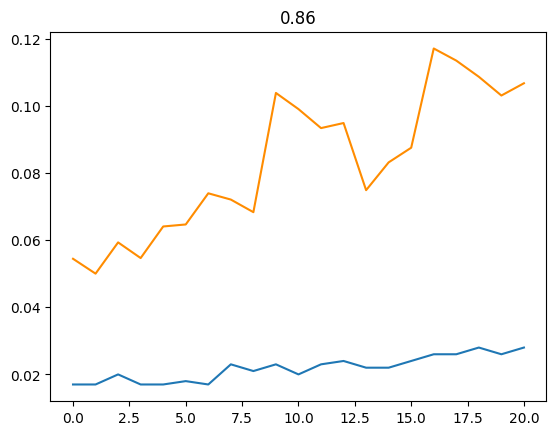

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
all   = pd.read_csv('staff_stud_stats.csv',index_col=0)
plt.plot(merged.index, merged['hispanic_pct'],label="Hispanic CS-Staff")
# plt.twinx()
plt.plot(merged.index, merged['hispanic_cs'],label="Hispanic CS",color='darkorange')
plt.title('Hispanic\nOrange: Student, Blue: Staff')
# plt.legend(['A', 'B'])
from scipy.stats import pearsonr
plt.title(round(pearsonr(merged['hispanic_pct'], merged['hispanic_cs'])[0], 2))


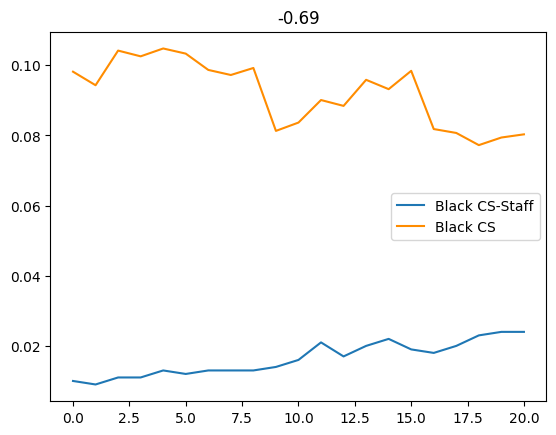

In [12]:
import pandas as pd
from matplotlib import pyplot as plt



all   = pd.read_csv('staff_stud_stats.csv',index_col=0)
plt.plot(merged.index, merged['black_pct'],label="Black CS-Staff")
# plt.twinx()
plt.plot(merged.index, merged['black_cs'],label="Black CS",color='darkorange')

from scipy.stats import pearsonr
plt.title(round(pearsonr(merged['black_pct'], merged['black_cs'])[0], 2))


plt.legend()


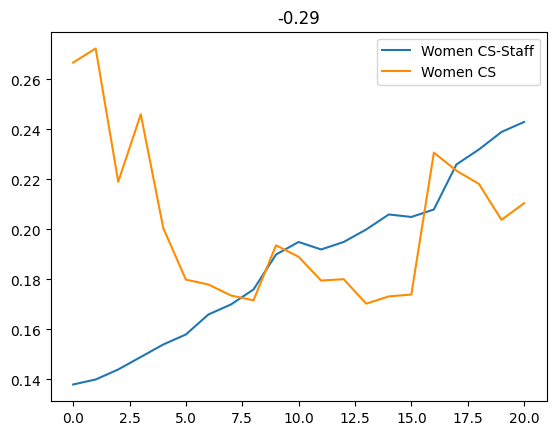

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
all   = pd.read_csv('staff_stud_stats.csv',index_col=0)
plt.plot(merged.index, merged['women_pct'],label="Women CS-Staff")
# plt.twinx()
plt.plot(merged.index, merged['women_cs'],label="Women CS",color='darkorange')

plt.title(round(pearsonr(merged['women_pct'], merged['women_cs'])[0], 2))


plt.legend()



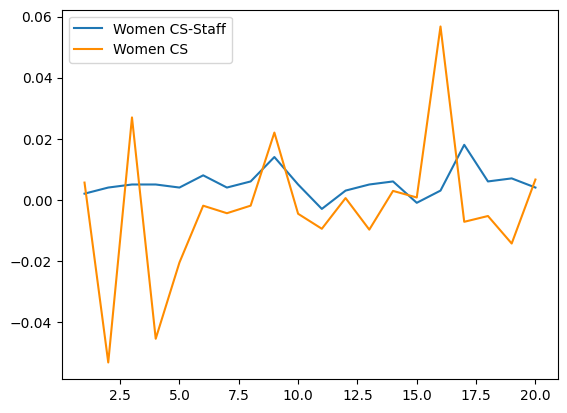

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
all   = pd.read_csv('staff_stud_stats.csv',index_col=0)
plt.plot(merged.index, merged['women_pct']-merged['women_pct'].shift(1),label="Women CS-Staff")
# plt.twinx()
plt.plot(merged.index, merged['women_cs']-merged['women_cs'].shift(1),label="Women CS",color='darkorange')



plt.legend()
